In [115]:
from getpass import getpass

# Prompt for token securely
token = getpass('Enter your GitHub personal access token: ')

# Clone using token authentication
!git clone https://{token}@github.com/pabasara-samarakoon-4176/MDT_prediction.git

Enter your GitHub personal access token: ··········
Cloning into 'MDT_prediction'...
remote: Enumerating objects: 105, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (95/95), done.
remote: Total 105 (delta 48), reused 31 (delta 8), pack-reused 0 (from 0)
Receiving objects: 100% (105/105), 870.01 KiB | 3.03 MiB/s, done.
Resolving deltas: 100% (48/48), done.


In [116]:
!ls /content/MDT_prediction/

'Building Density'	  geohash_8_kandy.ipynb
 building_density.ipynb   mdt_with_terrain_forest_road_building_population.csv
'forest coverage'	  README.md
 Forest_Coverage.py	 'Road Density'
 fyp_model.ipynb	  synthetic_generation_full.ipynb
 fyp_model_v2.ipynb	  synthetic_generation_inverted.ipynb
 fyp_model_v3.ipynb	 'Terrain features'
 fyp_model_v4.ipynb	  vegetation_coverage.ipynb


In [ ]:
!cp /content/drive/MyDrive/Colab\ Notebooks/fyp_model_v4.ipynb /content/MDT_prediction/

In [ ]:
!ls /content/MDT_prediction/

'Building Density'	  fyp_model_v4.ipynb
 building_density.ipynb   geohash_8_kandy.ipynb
'forest coverage'	  mdt_with_terrain_forest_road_building_population.csv
 Forest_Coverage.py	  README.md
 fyp_model.ipynb	  synthetic_generation_full.ipynb
 fyp_model_v2.ipynb	 'Terrain features'
 fyp_model_v3.ipynb	  vegetation_coverage.ipynb


In [ ]:
!git config --global user.email "pabasarasamarakoon2000@gmail.com"
!git config --global user.name "pabasara-samarakoon-4176"

In [ ]:
!cd /content/MDT_prediction && git add . && git commit -m "New model with multihead attention and positional encoding with geohash" && git push

[main 210aea1] New model with multihead attention and positional encoding with geohash
 1 file changed, 1 insertion(+)
 create mode 100644 fyp_model_v4.ipynb
Enumerating objects: 4, done.
Counting objects: 100% (4/4), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 45.62 KiB | 6.52 MiB/s, done.
Total 3 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/pabasara-samarakoon-4176/MDT_prediction.git
   1a239b6..210aea1  main -> main


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
filename = '/content/drive/MyDrive/Final_year_project/datasets/synthetic_v6.csv'
df = pd.read_csv(filename)
df.head()

,Geohash,building_count,total_road_length,lat,lon,elevation,slope,NDVI,Cell_ID,Site_latitude,Site_longitude,EARFCN_DL,population_density,RSRP,RSRQ,antenna_height,azimuth,tilt
0,tc0gzcp,0.0,0,6.290359,80.155563,92.001100,0.0,0.920012,Cell_66,6.423076,80.11789,525,653.233337,0.0,0.0,24.427576,158.003838,9.028885
1,tc0gzcr,0.0,0,6.291733,80.155563,53.171146,0.0,0.000000,Cell_66,6.423076,80.11789,525,618.614746,0.0,0.0,24.427576,158.003838,9.028885
2,tc0gzcy,0.0,120,6.294479,80.154190,35.364310,0.0,0.000000,Cell_66,6.423076,80.11789,525,618.614746,0.0,0.0,24.427576,158.003838,9.028885
3,tc0gzcz,0.0,230,6.294479,80.155563,14.790116,0.0,0.000000,Cell_66,6.423076,80.11789,525,618.614746,0.0,0.0,24.427576,158.003838,9.028885
4,tc0gzfm,0.0,0,6.297226,80.152817,56.604694,0.0,0.000000,Cell_66,6.423076,80.11789,525,618.614746,0.0,0.0,24.427576,158.003838,9.028885


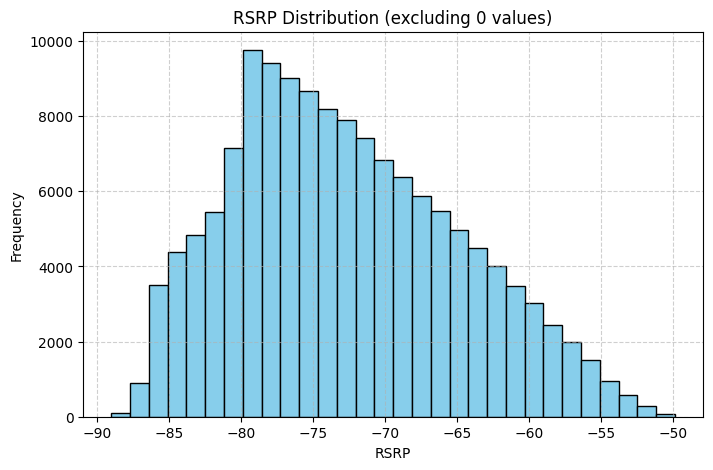

In [4]:
import matplotlib.pyplot as plt

# Filter out rows where RSRP is 0
df_filtered = df[df['RSRP'] != 0]

plt.figure(figsize=(8, 5))
plt.hist(df_filtered['RSRP'], bins=30, color='skyblue', edgecolor='black')
plt.title('RSRP Distribution (excluding 0 values)')
plt.xlabel('RSRP')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [5]:
df['Cell_ID'].value_counts().mean()

np.float64(22591.289256198346)

In [6]:
cell_counts = df['Cell_ID'].value_counts()
cell_counts

,count
Cell_ID,
Cell_157,81341
Cell_199,61239
Cell_33,58166
Cell_27,55521
Cell_191,54300
...,...
Cell_96,1023
Cell_1,601
Cell_100,286


In [7]:
df_157 = df[df['Cell_ID'] == 'Cell_157']
df_157.shape

(81341, 18)

In [8]:
df_171 = df[df['Cell_ID'] == 'Cell_171']
df_171.shape

(17850, 18)

In [9]:
df_6 = df[df['Cell_ID'] == 'Cell_6']
df_6.shape

(17782, 18)

In [10]:
df_157.head()

,Geohash,building_count,total_road_length,lat,lon,elevation,slope,NDVI,Cell_ID,Site_latitude,Site_longitude,EARFCN_DL,population_density,RSRP,RSRQ,antenna_height,azimuth,tilt
357738,tc1npvc,0.0,0,6.711960,80.498886,268.18753,0.0,0.870008,Cell_157,6.842825,80.587273,525,697.355713,0.0,0.0,33.947015,35.522149,6.24205
357741,tc1npvf,0.0,0,6.711960,80.500259,268.70950,0.0,0.870008,Cell_157,6.842825,80.587273,525,697.355713,0.0,0.0,33.947015,35.522149,6.24205
357742,tc1npvg,0.0,0,6.711960,80.501633,265.64706,0.0,0.870008,Cell_157,6.842825,80.587273,525,697.355713,0.0,0.0,33.947015,35.522149,6.24205
357777,tc1npwq,0.0,0,6.714706,80.494766,397.11790,0.0,0.870008,Cell_157,6.842825,80.587273,525,561.258850,0.0,0.0,33.947015,35.522149,6.24205
357778,tc1npwr,0.0,0,6.714706,80.496140,391.62613,0.0,0.870008,Cell_157,6.842825,80.587273,525,561.258850,0.0,0.0,33.947015,35.522149,6.24205


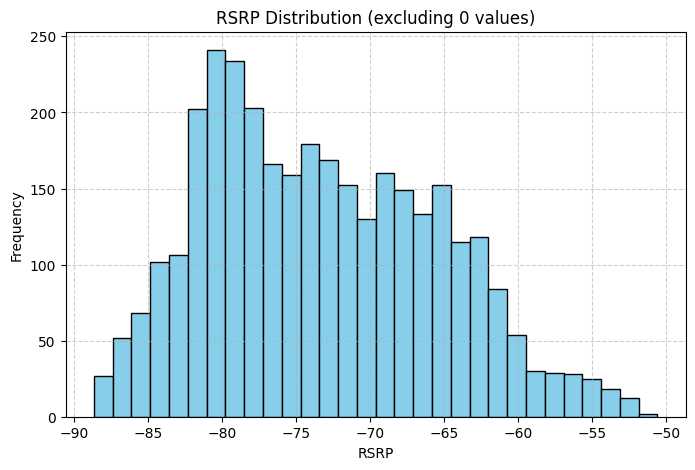

In [11]:
import matplotlib.pyplot as plt

# Filter out rows where RSRP is 0
df_157_filtered = df_157[df_157['RSRP'] != 0]

plt.figure(figsize=(8, 5))
plt.hist(df_157_filtered['RSRP'], bins=30, color='skyblue', edgecolor='black')
plt.title('RSRP Distribution (excluding 0 values)')
plt.xlabel('RSRP')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

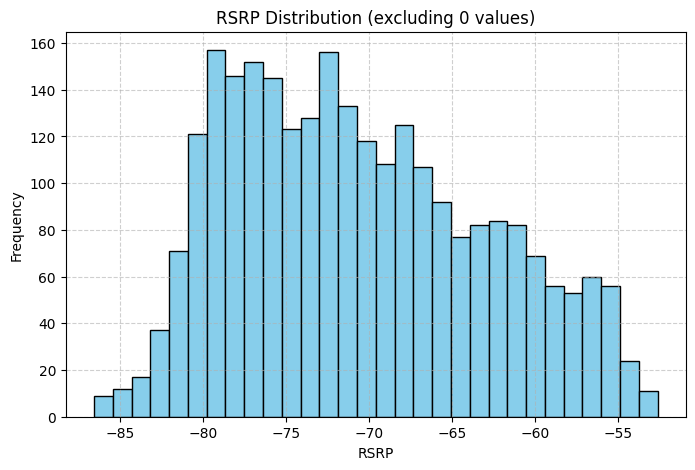

In [12]:
import matplotlib.pyplot as plt

# Filter out rows where RSRP is 0
df_171_filtered = df_171[df_171['RSRP'] != 0]

plt.figure(figsize=(8, 5))
plt.hist(df_171_filtered['RSRP'], bins=30, color='skyblue', edgecolor='black')
plt.title('RSRP Distribution (excluding 0 values)')
plt.xlabel('RSRP')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

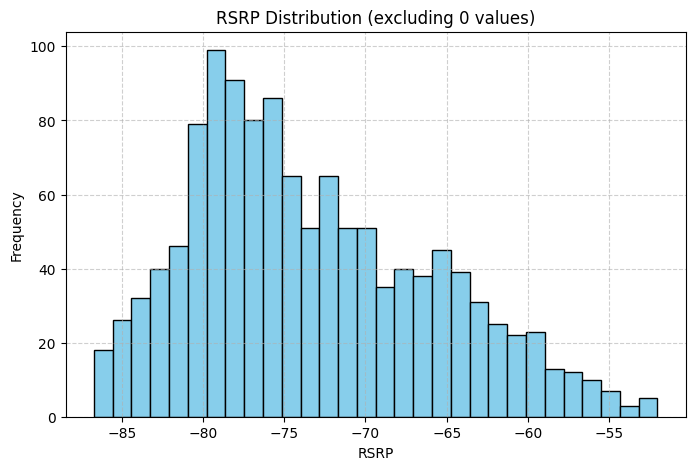

In [14]:
import matplotlib.pyplot as plt

# Filter out rows where RSRP is 0
df_6_filtered = df_6[df_6['RSRP'] != 0]

plt.figure(figsize=(8, 5))
plt.hist(df_6_filtered['RSRP'], bins=30, color='skyblue', edgecolor='black')
plt.title('RSRP Distribution (excluding 0 values)')
plt.xlabel('RSRP')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [15]:
df_157 = df_157.drop(columns=['lat', 'lon', 'slope', 'Cell_ID'])
df_157.head()

,Geohash,building_count,total_road_length,elevation,NDVI,Site_latitude,Site_longitude,EARFCN_DL,population_density,RSRP,RSRQ,antenna_height,azimuth,tilt
357738,tc1npvc,0.0,0,268.18753,0.870008,6.842825,80.587273,525,697.355713,0.0,0.0,33.947015,35.522149,6.24205
357741,tc1npvf,0.0,0,268.70950,0.870008,6.842825,80.587273,525,697.355713,0.0,0.0,33.947015,35.522149,6.24205
357742,tc1npvg,0.0,0,265.64706,0.870008,6.842825,80.587273,525,697.355713,0.0,0.0,33.947015,35.522149,6.24205
357777,tc1npwq,0.0,0,397.11790,0.870008,6.842825,80.587273,525,561.258850,0.0,0.0,33.947015,35.522149,6.24205
357778,tc1npwr,0.0,0,391.62613,0.870008,6.842825,80.587273,525,561.258850,0.0,0.0,33.947015,35.522149,6.24205


In [16]:
df_171 = df_171.drop(columns=['lat', 'lon', 'slope', 'Cell_ID'])
df_6 = df_6.drop(columns=['lat', 'lon', 'slope', 'Cell_ID'])

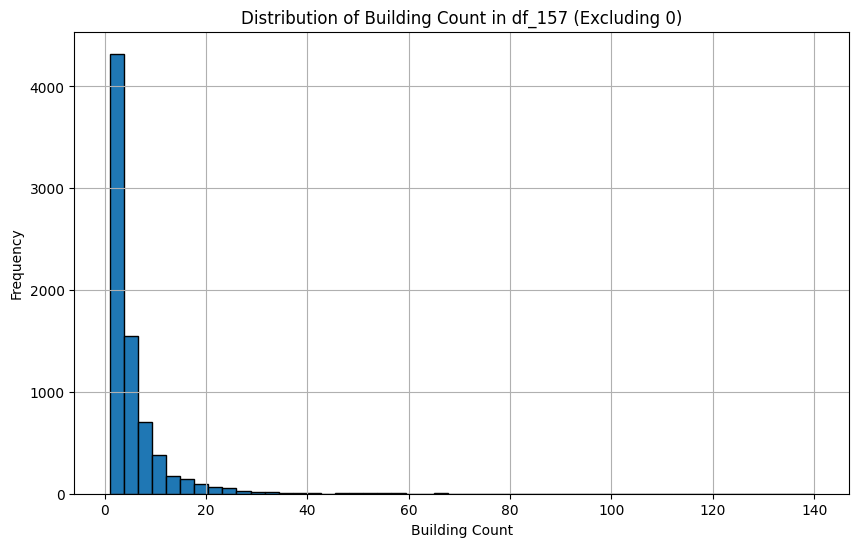

In [17]:
import matplotlib.pyplot as plt

# Filter out rows where building_count is 0
df_157_filtered = df_157[df_157['building_count'] > 0]

plt.figure(figsize=(10, 6))
plt.hist(df_157_filtered['building_count'], bins=50, edgecolor='black')
plt.xlabel('Building Count')
plt.ylabel('Frequency')
plt.title('Distribution of Building Count in df_157 (Excluding 0)')
plt.grid(True)
plt.show()

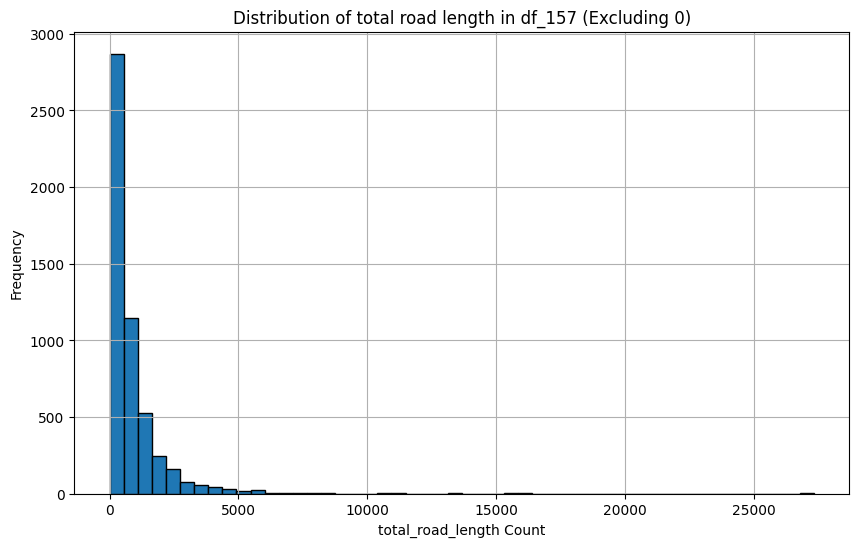

In [18]:
import matplotlib.pyplot as plt

# Filter out rows where building_count is 0
df_157_filtered = df_157[df_157['total_road_length'] > 0]

plt.figure(figsize=(10, 6))
plt.hist(df_157_filtered['total_road_length'], bins=50, edgecolor='black')
plt.xlabel('total_road_length Count')
plt.ylabel('Frequency')
plt.title('Distribution of total road length in df_157 (Excluding 0)')
plt.grid(True)
plt.show()

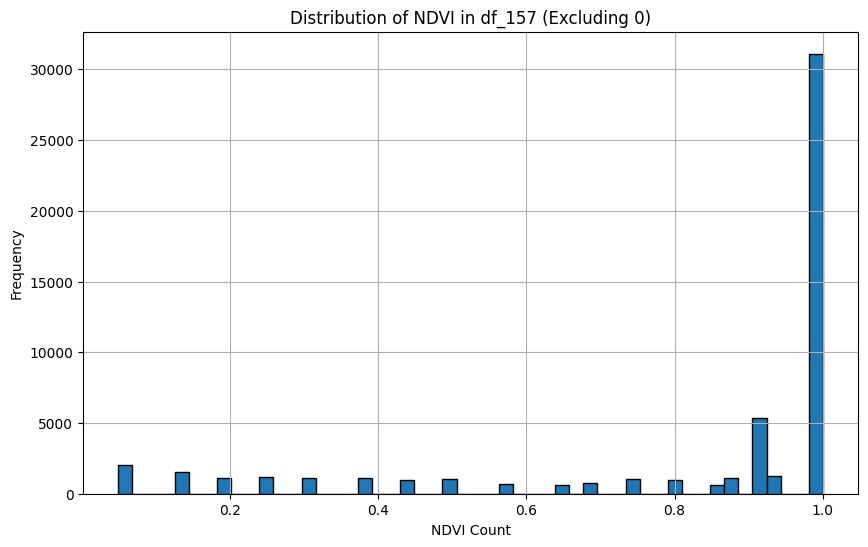

In [19]:
import matplotlib.pyplot as plt

# Filter out rows where building_count is 0
df_157_filtered = df_157[df_157['NDVI'] > 0]

plt.figure(figsize=(10, 6))
plt.hist(df_157_filtered['NDVI'], bins=50, edgecolor='black')
plt.xlabel('NDVI Count')
plt.ylabel('Frequency')
plt.title('Distribution of NDVI in df_157 (Excluding 0)')
plt.grid(True)
plt.show()

In [20]:
df_157.columns

Index(['Geohash', 'building_count', 'total_road_length', 'elevation', 'NDVI',
       'Site_latitude', 'Site_longitude', 'EARFCN_DL', 'population_density',
       'RSRP', 'RSRQ', 'antenna_height', 'azimuth', 'tilt'],
      dtype='object')

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

In [22]:
# train_frac = 0.8
# test_frac = 0.2

# unique_geohashes = df_157['Geohash'].unique()

# n_total = len(unique_geohashes)
# n_train = int(n_total * train_frac)

# train_geohashes = unique_geohashes[:n_train]
# test_geohashes = unique_geohashes[n_train:]

# train_df = df_157[df_157["Geohash"].isin(train_geohashes)].reset_index(drop=True)
# test_df = df_157[df_157["Geohash"].isin(test_geohashes)].reset_index(drop=True)

# print(f"Train: {train_df.shape}, Test: {test_df.shape}")

In [23]:
train_df = df_157
val_df = df_171
test_df = df_6

In [24]:
train_df.head()

,Geohash,building_count,total_road_length,elevation,NDVI,Site_latitude,Site_longitude,EARFCN_DL,population_density,RSRP,RSRQ,antenna_height,azimuth,tilt
357738,tc1npvc,0.0,0,268.18753,0.870008,6.842825,80.587273,525,697.355713,0.0,0.0,33.947015,35.522149,6.24205
357741,tc1npvf,0.0,0,268.70950,0.870008,6.842825,80.587273,525,697.355713,0.0,0.0,33.947015,35.522149,6.24205
357742,tc1npvg,0.0,0,265.64706,0.870008,6.842825,80.587273,525,697.355713,0.0,0.0,33.947015,35.522149,6.24205
357777,tc1npwq,0.0,0,397.11790,0.870008,6.842825,80.587273,525,561.258850,0.0,0.0,33.947015,35.522149,6.24205
357778,tc1npwr,0.0,0,391.62613,0.870008,6.842825,80.587273,525,561.258850,0.0,0.0,33.947015,35.522149,6.24205


In [25]:
val_df.head()

,Geohash,building_count,total_road_length,elevation,NDVI,Site_latitude,Site_longitude,EARFCN_DL,population_density,RSRP,RSRQ,antenna_height,azimuth,tilt
1662252,tc3p5gv,0.0,0,98.283810,0.190005,8.430836,80.477467,525,74.736237,0.0,0.0,34.774905,201.672735,7.007188
1662255,tc3p5gy,0.0,0,98.602264,0.059998,8.430836,80.477467,525,74.736237,0.0,0.0,34.774905,201.672735,7.007188
1662256,tc3p5gz,0.0,0,100.920265,0.059998,8.430836,80.477467,525,74.736237,0.0,0.0,34.774905,201.672735,7.007188
1662340,tc3p5km,0.0,0,86.237490,0.000000,8.430836,80.477467,525,90.278992,0.0,0.0,34.774905,201.672735,7.007188
1662341,tc3p5kn,0.0,0,84.224730,0.130007,8.430836,80.477467,525,86.762192,0.0,0.0,34.774905,201.672735,7.007188


In [26]:
test_df.head()

,Geohash,building_count,total_road_length,elevation,NDVI,Site_latitude,Site_longitude,EARFCN_DL,population_density,RSRP,RSRQ,antenna_height,azimuth,tilt
225432,tc1hggp,0.0,0,209.68503,0.800015,6.467933,80.378157,1650,11.129096,0.0,0.0,23.919494,179.151885,11.549291
225434,tc1hggr,0.0,0,201.55250,1.000000,6.467933,80.378157,1650,11.129096,0.0,0.0,23.919494,179.151885,11.549291
225438,tc1hggv,0.0,0,224.30121,0.000000,6.467933,80.378157,1650,11.129096,0.0,0.0,23.919494,179.151885,11.549291
225439,tc1hggw,0.0,0,210.89190,1.000000,6.467933,80.378157,1650,11.129096,0.0,0.0,23.919494,179.151885,11.549291
225440,tc1hggx,0.0,0,192.35240,1.000000,6.467933,80.378157,1650,11.129096,0.0,0.0,23.919494,179.151885,11.549291


In [27]:
from sklearn.preprocessing import LabelEncoder

# Encode Geohash
le = LabelEncoder()
train_df['Geohash'] = le.fit_transform(train_df['Geohash'])
val_df['Geohash'] = le.fit_transform(val_df['Geohash'])
test_df['Geohash'] = le.fit_transform(test_df['Geohash'])

In [28]:
train_df.head()

,Geohash,building_count,total_road_length,elevation,NDVI,Site_latitude,Site_longitude,EARFCN_DL,population_density,RSRP,RSRQ,antenna_height,azimuth,tilt
357738,0,0.0,0,268.18753,0.870008,6.842825,80.587273,525,697.355713,0.0,0.0,33.947015,35.522149,6.24205
357741,1,0.0,0,268.70950,0.870008,6.842825,80.587273,525,697.355713,0.0,0.0,33.947015,35.522149,6.24205
357742,2,0.0,0,265.64706,0.870008,6.842825,80.587273,525,697.355713,0.0,0.0,33.947015,35.522149,6.24205
357777,3,0.0,0,397.11790,0.870008,6.842825,80.587273,525,561.258850,0.0,0.0,33.947015,35.522149,6.24205
357778,4,0.0,0,391.62613,0.870008,6.842825,80.587273,525,561.258850,0.0,0.0,33.947015,35.522149,6.24205


In [29]:
val_df.head()

,Geohash,building_count,total_road_length,elevation,NDVI,Site_latitude,Site_longitude,EARFCN_DL,population_density,RSRP,RSRQ,antenna_height,azimuth,tilt
1662252,0,0.0,0,98.283810,0.190005,8.430836,80.477467,525,74.736237,0.0,0.0,34.774905,201.672735,7.007188
1662255,1,0.0,0,98.602264,0.059998,8.430836,80.477467,525,74.736237,0.0,0.0,34.774905,201.672735,7.007188
1662256,2,0.0,0,100.920265,0.059998,8.430836,80.477467,525,74.736237,0.0,0.0,34.774905,201.672735,7.007188
1662340,3,0.0,0,86.237490,0.000000,8.430836,80.477467,525,90.278992,0.0,0.0,34.774905,201.672735,7.007188
1662341,4,0.0,0,84.224730,0.130007,8.430836,80.477467,525,86.762192,0.0,0.0,34.774905,201.672735,7.007188


In [30]:
test_df.head()

,Geohash,building_count,total_road_length,elevation,NDVI,Site_latitude,Site_longitude,EARFCN_DL,population_density,RSRP,RSRQ,antenna_height,azimuth,tilt
225432,0,0.0,0,209.68503,0.800015,6.467933,80.378157,1650,11.129096,0.0,0.0,23.919494,179.151885,11.549291
225434,1,0.0,0,201.55250,1.000000,6.467933,80.378157,1650,11.129096,0.0,0.0,23.919494,179.151885,11.549291
225438,2,0.0,0,224.30121,0.000000,6.467933,80.378157,1650,11.129096,0.0,0.0,23.919494,179.151885,11.549291
225439,3,0.0,0,210.89190,1.000000,6.467933,80.378157,1650,11.129096,0.0,0.0,23.919494,179.151885,11.549291
225440,4,0.0,0,192.35240,1.000000,6.467933,80.378157,1650,11.129096,0.0,0.0,23.919494,179.151885,11.549291


In [31]:
features = ['EARFCN_DL', 'antenna_height', 'azimuth', 'tilt',
            'Site_latitude', 'Site_longitude', 'building_count',
            'total_road_length', 'elevation', 'NDVI', 'population_density']

positional_encoding = ['Geohash']

target = ['RSRP', 'RSRQ']

In [32]:
len(features)

11

In [33]:
feature_scalers = {}
for col in features:
    scaler = StandardScaler()
    train_df[f"{col}"] = scaler.fit_transform(train_df[[col]])
    val_df[f"{col}"] = scaler.fit_transform(val_df[[col]])
    test_df[f"{col}"] = scaler.fit_transform(test_df[[col]])
    feature_scalers[col] = scaler

In [34]:
feature_scalers

{'EARFCN_DL': StandardScaler(),
 'antenna_height': StandardScaler(),
 'azimuth': StandardScaler(),
 'tilt': StandardScaler(),
 'Site_latitude': StandardScaler(),
 'Site_longitude': StandardScaler(),
 'building_count': StandardScaler(),
 'total_road_length': StandardScaler(),
 'elevation': StandardScaler(),
 'NDVI': StandardScaler(),
 'population_density': StandardScaler()}

In [35]:
target_scalers = {}
for col in target:
    scaler = StandardScaler()
    train_df[f"{col}"] = scaler.fit_transform(train_df[[col]])
    val_df[f"{col}"] = scaler.fit_transform(val_df[[col]])
    test_df[f"{col}"] = scaler.fit_transform(test_df[[col]])
    target_scalers[col] = scaler

In [36]:
target_scalers

{'RSRP': StandardScaler(), 'RSRQ': StandardScaler()}

In [37]:
train_df.head()

,Geohash,building_count,total_road_length,elevation,NDVI,Site_latitude,Site_longitude,EARFCN_DL,population_density,RSRP,RSRQ,antenna_height,azimuth,tilt
357738,0,-0.18615,-0.148245,-1.869811,0.719172,2.664535e-15,-4.263256e-14,0.0,0.681047,0.204392,0.203341,0.0,0.0,0.0
357741,1,-0.18615,-0.148245,-1.868810,0.719172,2.664535e-15,-4.263256e-14,0.0,0.681047,0.204392,0.203341,0.0,0.0,0.0
357742,2,-0.18615,-0.148245,-1.874679,0.719172,2.664535e-15,-4.263256e-14,0.0,0.681047,0.204392,0.203341,0.0,0.0,0.0
357777,3,-0.18615,-0.148245,-1.622723,0.719172,2.664535e-15,-4.263256e-14,0.0,0.391300,0.204392,0.203341,0.0,0.0,0.0
357778,4,-0.18615,-0.148245,-1.633247,0.719172,2.664535e-15,-4.263256e-14,0.0,0.391300,0.204392,0.203341,0.0,0.0,0.0


In [38]:
train_df.shape

(81341, 14)

In [39]:
val_df.head()

,Geohash,building_count,total_road_length,elevation,NDVI,Site_latitude,Site_longitude,EARFCN_DL,population_density,RSRP,RSRQ,antenna_height,azimuth,tilt
1662252,0,-0.449847,-0.186722,0.924586,-0.124374,3.552714e-15,-1.421085e-14,0.0,-0.484122,0.411157,0.408567,7.105427e-15,5.684342e-14,-2.664535e-15
1662255,1,-0.449847,-0.186722,0.952574,-0.696198,3.552714e-15,-1.421085e-14,0.0,-0.484122,0.411157,0.408567,7.105427e-15,5.684342e-14,-2.664535e-15
1662256,2,-0.449847,-0.186722,1.156295,-0.696198,3.552714e-15,-1.421085e-14,0.0,-0.484122,0.411157,0.408567,7.105427e-15,5.684342e-14,-2.664535e-15
1662340,3,-0.449847,-0.186722,-0.134122,-0.960096,3.552714e-15,-1.421085e-14,0.0,-0.456196,0.411157,0.408567,7.105427e-15,5.684342e-14,-2.664535e-15
1662341,4,-0.449847,-0.186722,-0.311017,-0.388272,3.552714e-15,-1.421085e-14,0.0,-0.462514,0.411157,0.408567,7.105427e-15,5.684342e-14,-2.664535e-15


In [40]:
val_df.shape

(17850, 14)

In [41]:
test_df.head()

,Geohash,building_count,total_road_length,elevation,NDVI,Site_latitude,Site_longitude,EARFCN_DL,population_density,RSRP,RSRQ,antenna_height,azimuth,tilt
225432,0,-0.293663,-0.094997,-1.372459,0.896661,-8.881784e-16,-1.421085e-14,0.0,-0.849972,0.27088,0.269528,-3.552714e-15,0.0,1.776357e-15
225434,1,-0.293663,-0.094997,-1.412098,1.390586,-8.881784e-16,-1.421085e-14,0.0,-0.849972,0.27088,0.269528,-3.552714e-15,0.0,1.776357e-15
225438,2,-0.293663,-0.094997,-1.301216,-1.079228,-8.881784e-16,-1.421085e-14,0.0,-0.849972,0.27088,0.269528,-3.552714e-15,0.0,1.776357e-15
225439,3,-0.293663,-0.094997,-1.366576,1.390586,-8.881784e-16,-1.421085e-14,0.0,-0.849972,0.27088,0.269528,-3.552714e-15,0.0,1.776357e-15
225440,4,-0.293663,-0.094997,-1.456942,1.390586,-8.881784e-16,-1.421085e-14,0.0,-0.849972,0.27088,0.269528,-3.552714e-15,0.0,1.776357e-15


In [42]:
test_df.shape

(17782, 14)

In [43]:
def prepare_sequence_tensor(df, seq_len, feature_cols, pos_cols, target_cols):
    N = (len(df) // seq_len) * seq_len
    df = df.iloc[:N]

    num_seq = N // seq_len
    input_tensor = torch.tensor(df[feature_cols].values, dtype=torch.float32).view(num_seq, seq_len, -1)
    pos_tensor = torch.tensor(df[pos_cols].values, dtype=torch.float32).view(num_seq, seq_len, -1)
    target_tensor = torch.tensor(df[target_cols].values, dtype=torch.float32).view(num_seq, seq_len, -1)
    return input_tensor, pos_tensor, target_tensor

In [44]:
sequence_length = 256

In [45]:
X_train, pos_train, y_train = prepare_sequence_tensor(train_df, sequence_length, features, positional_encoding, target)
X_val, pos_val, y_val = prepare_sequence_tensor(val_df, sequence_length, features, positional_encoding, target)
X_test, pos_test, y_test = prepare_sequence_tensor(test_df, sequence_length, features, positional_encoding, target)

In [47]:
print("Training data shapes:")
print(f"X_train.shape: {X_train.shape}")
print(f"pos_train.shape: {pos_train.shape}")
print(f"y_train.shape: {y_train.shape}")

print("\nValidation data shapes:")
print(f"X_val.shape: {X_val.shape}")
print(f"pos_val.shape: {pos_val.shape}")
print(f"y_val.shape: {y_val.shape}")

print("\nTest data shapes:")
print(f"X_test.shape: {X_test.shape}")
print(f"pos_test.shape: {pos_test.shape}")
print(f"y_test.shape: {y_test.shape}")

Training data shapes:
X_train.shape: torch.Size([317, 256, 11])
pos_train.shape: torch.Size([317, 256, 1])
y_train.shape: torch.Size([317, 256, 2])

Validation data shapes:
X_val.shape: torch.Size([69, 256, 11])
pos_val.shape: torch.Size([69, 256, 1])
y_val.shape: torch.Size([69, 256, 2])

Test data shapes:
X_test.shape: torch.Size([69, 256, 11])
pos_test.shape: torch.Size([69, 256, 1])
y_test.shape: torch.Size([69, 256, 2])


In [48]:
batch_size = 32

In [49]:
train_loader = DataLoader(TensorDataset(X_train, pos_train, y_train), batch_size=batch_size)
val_loader = DataLoader(TensorDataset(X_val, pos_val, y_val), batch_size=batch_size)
test_loader = DataLoader(TensorDataset(X_test, pos_test, y_test), batch_size=batch_size)

In [50]:
class MultiHeadAttention(nn.Module):
    def __init__(self, d_model, num_heads):
        super().__init__()
        self.num_heads = num_heads
        self.d_k = d_model // num_heads
        self.qkv_proj = nn.Linear(d_model, d_model * 3)
        self.out_proj = nn.Linear(d_model, d_model)

    def forward(self, x):
        B, S, D = x.shape
        qkv = self.qkv_proj(x).reshape(B, S, self.num_heads, 3 * self.d_k).transpose(1, 2)
        Q, K, V = qkv.chunk(3, dim=-1)
        scores = Q @ K.transpose(-2, -1) / np.sqrt(self.d_k)
        attn = F.softmax(scores, dim=-1)
        context = attn @ V
        context = context.transpose(1, 2).reshape(B, S, D)
        return self.out_proj(context)

In [76]:
class TransformerBlock(nn.Module):
    def __init__(self, d_model, num_heads, d_ff, dropout=0.5):
        super().__init__()
        self.attn = MultiHeadAttention(d_model, num_heads)
        self.norm1 = nn.LayerNorm(d_model)
        self.ff = nn.Sequential(
            nn.Linear(d_model, d_ff),
            nn.ReLU(),
            nn.Linear(d_ff, d_model)
        )
        self.norm2 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        x = self.norm1(x + self.dropout(self.attn(x)))
        return self.norm2(x + self.dropout(self.ff(x)))

In [77]:
class TransformerModel(nn.Module):
    def __init__(self, input_dim, output_dim, d_model=128, num_heads=1, num_layers=2, d_ff=256):
        super().__init__()
        self.input_proj = nn.Linear(input_dim, d_model)
        self.pos_proj = nn.Linear(1, d_model)
        self.layers = nn.ModuleList([
            TransformerBlock(d_model, num_heads, d_ff) for _ in range(num_layers)
        ])
        self.output_layer = nn.Linear(d_model, output_dim)

    def forward(self, x, pos):
        x = self.input_proj(x) + self.pos_proj(pos)
        for layer in self.layers:
            x = layer(x)
        return self.output_layer(x)

In [78]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [79]:
model = TransformerModel(input_dim=len(features), output_dim=len(target)).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

In [80]:
epochs = 20
train_losses = []
val_losses = []

In [81]:
for epoch in range(1, epochs + 1):
    model.train()
    train_loss = 0
    for xb, pb, yb in train_loader:
        xb, pb, yb = xb.to(device), pb.to(device), yb.to(device)
        optimizer.zero_grad()
        preds = model(xb, pb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    avg_train_loss = train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for xb, pb, yb in val_loader:
            xb, pb, yb = xb.to(device), pb.to(device), yb.to(device)
            preds = model(xb, pb)
            loss = criterion(preds, yb)
            val_loss += loss.item()

    avg_val_loss = val_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    print(f"Epoch [{epoch}/{epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

Epoch [1/20], Train Loss: 1.7044, Val Loss: 1.3020
Epoch [2/20], Train Loss: 1.1659, Val Loss: 1.3880
Epoch [3/20], Train Loss: 1.0989, Val Loss: 1.2907
Epoch [4/20], Train Loss: 1.0511, Val Loss: 1.3294
Epoch [5/20], Train Loss: 1.0623, Val Loss: 1.3079
Epoch [6/20], Train Loss: 1.0461, Val Loss: 1.3004
Epoch [7/20], Train Loss: 1.0408, Val Loss: 1.3107
Epoch [8/20], Train Loss: 1.0417, Val Loss: 1.3050
Epoch [9/20], Train Loss: 1.0371, Val Loss: 1.3065
Epoch [10/20], Train Loss: 1.0363, Val Loss: 1.3075
Epoch [11/20], Train Loss: 1.0351, Val Loss: 1.3059
Epoch [12/20], Train Loss: 1.0331, Val Loss: 1.3063
Epoch [13/20], Train Loss: 1.0307, Val Loss: 1.3068
Epoch [14/20], Train Loss: 1.0292, Val Loss: 1.3073
Epoch [15/20], Train Loss: 1.0275, Val Loss: 1.3078
Epoch [16/20], Train Loss: 1.0262, Val Loss: 1.3078
Epoch [17/20], Train Loss: 1.0252, Val Loss: 1.3082
Epoch [18/20], Train Loss: 1.0243, Val Loss: 1.3080
Epoch [19/20], Train Loss: 1.0258, Val Loss: 1.3063
Epoch [20/20], Train 

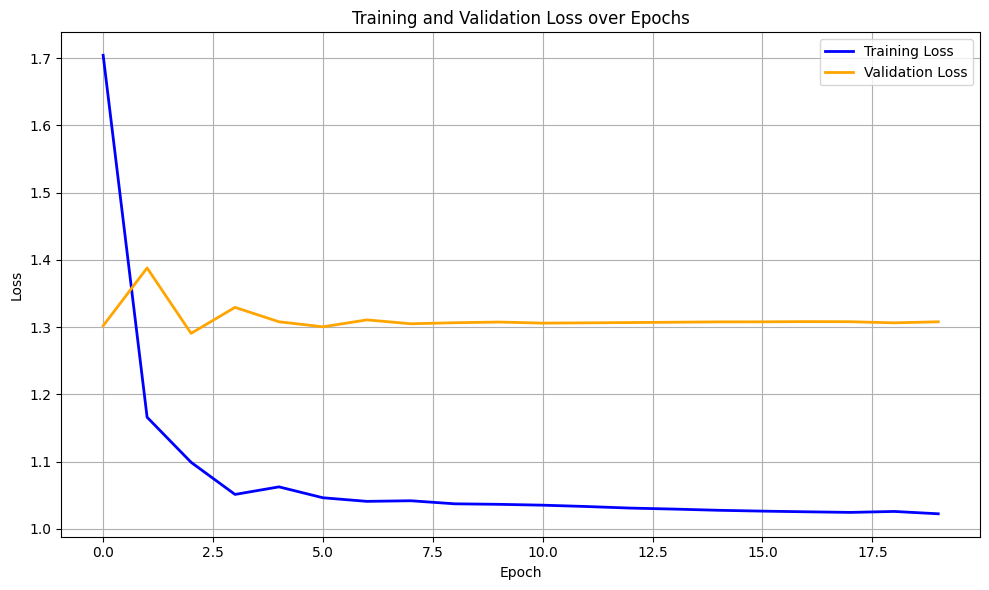

In [82]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss', color='blue', linewidth=2)
plt.plot(val_losses, label='Validation Loss', color='orange', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [83]:
model.eval()
X_test = X_test.to(device)
pos_test = pos_test.to(device)
y_test = y_test.to(device)

In [88]:
model.eval()
criterion = nn.MSELoss(reduction='mean')
total_loss = 0
per_target_loss = torch.zeros(y_test.shape[-1])

In [89]:
with torch.no_grad():
    predictions = model(X_test, pos_test)

In [90]:
predictions.shape

torch.Size([69, 256, 2])

In [91]:
with torch.no_grad():
    predictions = model(X_test, pos_test)
    if predictions.shape[-1] == 1 and y_test.shape[-1] > 1:
        raise ValueError("Model output is single-valued, but multiple targets are expected.")

    if predictions.shape[-1] == 1:
        predictions = predictions.squeeze(-1)
        y_test = y_test.squeeze(-1)
        total_loss = criterion(predictions, y_test)
        print(f"Test Loss: {total_loss.item():.4f}")

    for i in range(y_test.shape[-1]):
        loss = criterion(predictions[:, :, i], y_test[:, :, i])
        per_target_loss[i] = loss

    print(f"Per-Target Loss: {per_target_loss.tolist()}")
    for i in range(y_test.shape[-1]):
        name = target[i] if target else f"Target {i+1}"
        print(f"{name}: {per_target_loss[i].item():.4f}")

    print(f"\nAverage Test Loss: {per_target_loss.mean().item():.4f}")

Per-Target Loss: [1.0074204206466675, 1.0062534809112549]
RSRP: 1.0074
RSRQ: 1.0063

Average Test Loss: 1.0068


In [92]:
preds_np = predictions.detach().cpu().numpy().reshape(-1, preds.shape[-1])
X_flat = X_test.reshape(-1, X_test.shape[-1]).cpu().numpy()
pos_flat = pos_test.reshape(-1, pos_test.shape[-1]).cpu().numpy()

In [93]:
features_df = pd.DataFrame(X_flat, columns=features)
pos_df = pd.DataFrame(pos_flat, columns=positional_encoding)
preds_df = pd.DataFrame(preds_np, columns=[f'{col}' for col in target])

In [94]:
predicted_df = pd.concat([features_df, pos_df, preds_df], axis=1)
predicted_df.head()

,EARFCN_DL,antenna_height,azimuth,tilt,Site_latitude,Site_longitude,building_count,total_road_length,elevation,NDVI,population_density,Geohash,RSRP,RSRQ
0,0.0,-3.552714e-15,0.0,1.776357e-15,-8.881784e-16,-1.421085e-14,-0.293663,-0.094997,-1.372459,0.896661,-0.849972,0.0,0.119411,0.157382
1,0.0,-3.552714e-15,0.0,1.776357e-15,-8.881784e-16,-1.421085e-14,-0.293663,-0.094997,-1.412099,1.390586,-0.849972,1.0,0.117968,0.156299
2,0.0,-3.552714e-15,0.0,1.776357e-15,-8.881784e-16,-1.421085e-14,-0.293663,-0.094997,-1.301216,-1.079228,-0.849972,2.0,0.116789,0.155512
3,0.0,-3.552714e-15,0.0,1.776357e-15,-8.881784e-16,-1.421085e-14,-0.293663,-0.094997,-1.366576,1.390586,-0.849972,3.0,0.115417,0.154204
4,0.0,-3.552714e-15,0.0,1.776357e-15,-8.881784e-16,-1.421085e-14,-0.293663,-0.094997,-1.456942,1.390586,-0.849972,4.0,0.114158,0.153173


In [95]:
# Inverse transform features
for col, scaler in feature_scalers.items():
    predicted_df[col] = scaler.inverse_transform(predicted_df[[col]])

# Inverse transform targets
for col, scaler in target_scalers.items():
    predicted_df[col] = scaler.inverse_transform(predicted_df[[col]])

predicted_df.head()

,EARFCN_DL,antenna_height,azimuth,tilt,Site_latitude,Site_longitude,building_count,total_road_length,elevation,NDVI,population_density,Geohash,RSRP,RSRQ
0,1650.0,23.919495,179.151886,11.549291,6.467933,80.378159,1.005590e-08,2.207470e-07,209.685028,8.000153e-01,11.129087,0.0,-2.831836,-0.501679
1,1650.0,23.919495,179.151886,11.549291,6.467933,80.378159,1.005590e-08,2.207470e-07,201.552490,1.000000e+00,11.129087,1.0,-2.858814,-0.506524
2,1650.0,23.919495,179.151886,11.549291,6.467933,80.378159,1.005590e-08,2.207470e-07,224.301208,-1.640137e-08,11.129087,2.0,-2.880858,-0.510043
3,1650.0,23.919495,179.151886,11.549291,6.467933,80.378159,1.005590e-08,2.207470e-07,210.891907,1.000000e+00,11.129087,3.0,-2.906501,-0.515896
4,1650.0,23.919495,179.151886,11.549291,6.467933,80.378159,1.005590e-08,2.207470e-07,192.352417,1.000000e+00,11.129087,4.0,-2.930033,-0.520506


In [96]:
predicted_df['Geohash'] = predicted_df['Geohash'].astype(int)
predicted_df.head()

,EARFCN_DL,antenna_height,azimuth,tilt,Site_latitude,Site_longitude,building_count,total_road_length,elevation,NDVI,population_density,Geohash,RSRP,RSRQ
0,1650.0,23.919495,179.151886,11.549291,6.467933,80.378159,1.005590e-08,2.207470e-07,209.685028,8.000153e-01,11.129087,0,-2.831836,-0.501679
1,1650.0,23.919495,179.151886,11.549291,6.467933,80.378159,1.005590e-08,2.207470e-07,201.552490,1.000000e+00,11.129087,1,-2.858814,-0.506524
2,1650.0,23.919495,179.151886,11.549291,6.467933,80.378159,1.005590e-08,2.207470e-07,224.301208,-1.640137e-08,11.129087,2,-2.880858,-0.510043
3,1650.0,23.919495,179.151886,11.549291,6.467933,80.378159,1.005590e-08,2.207470e-07,210.891907,1.000000e+00,11.129087,3,-2.906501,-0.515896
4,1650.0,23.919495,179.151886,11.549291,6.467933,80.378159,1.005590e-08,2.207470e-07,192.352417,1.000000e+00,11.129087,4,-2.930033,-0.520506


In [97]:
# Decode Geohash
predicted_df['Geohash'] = le.inverse_transform(predicted_df['Geohash'].astype(int))
predicted_df.head()

,EARFCN_DL,antenna_height,azimuth,tilt,Site_latitude,Site_longitude,building_count,total_road_length,elevation,NDVI,population_density,Geohash,RSRP,RSRQ
0,1650.0,23.919495,179.151886,11.549291,6.467933,80.378159,1.005590e-08,2.207470e-07,209.685028,8.000153e-01,11.129087,tc1hggp,-2.831836,-0.501679
1,1650.0,23.919495,179.151886,11.549291,6.467933,80.378159,1.005590e-08,2.207470e-07,201.552490,1.000000e+00,11.129087,tc1hggr,-2.858814,-0.506524
2,1650.0,23.919495,179.151886,11.549291,6.467933,80.378159,1.005590e-08,2.207470e-07,224.301208,-1.640137e-08,11.129087,tc1hggv,-2.880858,-0.510043
3,1650.0,23.919495,179.151886,11.549291,6.467933,80.378159,1.005590e-08,2.207470e-07,210.891907,1.000000e+00,11.129087,tc1hggw,-2.906501,-0.515896
4,1650.0,23.919495,179.151886,11.549291,6.467933,80.378159,1.005590e-08,2.207470e-07,192.352417,1.000000e+00,11.129087,tc1hggx,-2.930033,-0.520506


In [99]:
predicted_df.shape

(17664, 14)

In [101]:
predicted_df['Cell_ID'] = "Cell_6"
predicted_df.head()

,EARFCN_DL,antenna_height,azimuth,tilt,Site_latitude,Site_longitude,building_count,total_road_length,elevation,NDVI,population_density,Geohash,RSRP,RSRQ,Cell_ID
0,1650.0,23.919495,179.151886,11.549291,6.467933,80.378159,1.005590e-08,2.207470e-07,209.685028,8.000153e-01,11.129087,tc1hggp,-2.831836,-0.501679,Cell_6
1,1650.0,23.919495,179.151886,11.549291,6.467933,80.378159,1.005590e-08,2.207470e-07,201.552490,1.000000e+00,11.129087,tc1hggr,-2.858814,-0.506524,Cell_6
2,1650.0,23.919495,179.151886,11.549291,6.467933,80.378159,1.005590e-08,2.207470e-07,224.301208,-1.640137e-08,11.129087,tc1hggv,-2.880858,-0.510043,Cell_6
3,1650.0,23.919495,179.151886,11.549291,6.467933,80.378159,1.005590e-08,2.207470e-07,210.891907,1.000000e+00,11.129087,tc1hggw,-2.906501,-0.515896,Cell_6
4,1650.0,23.919495,179.151886,11.549291,6.467933,80.378159,1.005590e-08,2.207470e-07,192.352417,1.000000e+00,11.129087,tc1hggx,-2.930033,-0.520506,Cell_6


In [109]:
df_6_actual = df[df['Cell_ID'] == 'Cell_6']
df_6_actual.head()

,Geohash,building_count,total_road_length,lat,lon,elevation,slope,NDVI,Cell_ID,Site_latitude,Site_longitude,EARFCN_DL,population_density,RSRP,RSRQ,antenna_height,azimuth,tilt
225432,tc1hggp,0.0,0,6.477127,80.331345,209.68503,0.0,0.800015,Cell_6,6.467933,80.378157,1650,11.129096,0.0,0.0,23.919494,179.151885,11.549291
225434,tc1hggr,0.0,0,6.478500,80.331345,201.55250,0.0,1.000000,Cell_6,6.467933,80.378157,1650,11.129096,0.0,0.0,23.919494,179.151885,11.549291
225438,tc1hggv,0.0,0,6.481247,80.328598,224.30121,0.0,0.000000,Cell_6,6.467933,80.378157,1650,11.129096,0.0,0.0,23.919494,179.151885,11.549291
225439,tc1hggw,0.0,0,6.479874,80.329971,210.89190,0.0,1.000000,Cell_6,6.467933,80.378157,1650,11.129096,0.0,0.0,23.919494,179.151885,11.549291
225440,tc1hggx,0.0,0,6.479874,80.331345,192.35240,0.0,1.000000,Cell_6,6.467933,80.378157,1650,11.129096,0.0,0.0,23.919494,179.151885,11.549291


In [110]:
missing_geohashes = df_6_actual[~df_6_actual['Geohash'].isin(predicted_df['Geohash'])]
print(f"Number of rows missing in predicted_df: {missing_geohashes.shape[0]}")

# Drop missing rows from df_6
df_6_filtered = df_6_actual[df_6_actual['Geohash'].isin(predicted_df['Geohash'])].reset_index(drop=True)
print(f"Shape of df_6 after dropping missing rows: {df_6_filtered.shape}")

Number of rows missing in predicted_df: 118
Shape of df_6 after dropping missing rows: (17664, 18)


In [111]:
predicted_df.shape

(17664, 15)

In [112]:
df_6_filtered.shape

(17664, 18)

In [113]:
predicted_df.to_csv('/content/drive/MyDrive/Final_year_project/datasets/predicted_df_model_v4.csv')

In [114]:
df_6_filtered.to_csv('/content/drive/MyDrive/Final_year_project/datasets/actual_df_model_v4.csv')